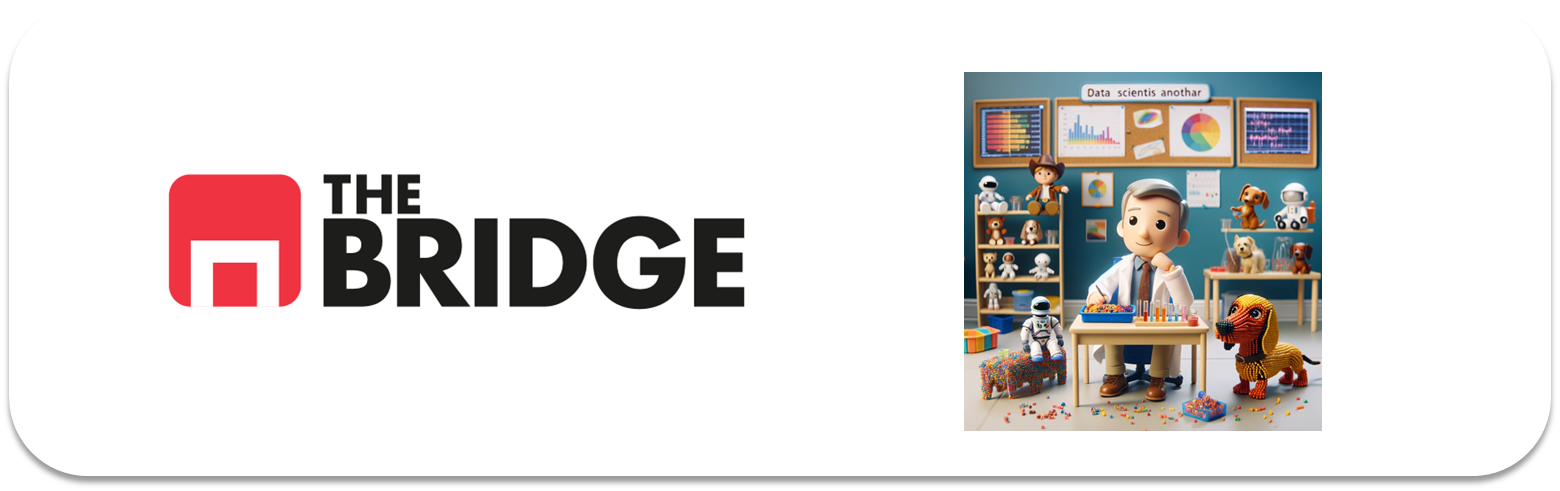

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_titanic = sns.load_dataset("<titanic>")

ValueError: '<titanic>' is not one of the example datasets.

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [10]:
df = pd.read_csv("titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [13]:
nulos = df.isnull().sum()
porcentaje_nulos = (nulos/len(df))*100
print(f"Este es el porcentaje de nulos: ", porcentaje_nulos)

Este es el porcentaje de nulos:  survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [15]:
df.drop(columns = ["parch"])

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
df.drop(columns = ["deck"])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df['columna'].fillna(df['columna'].mean(), inplace=True)

In [17]:
df["age"].fillna(df["age"].mean(), inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_37544\820119973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace = True)


In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
df['age'].fillna(int(df['age'].mean()), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_37544\1559435917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(int(df['age'].mean()), inplace=True)


In [27]:
df['age'] = df['age'].astype(int)

In [28]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [34]:
df[df["survived"] == 1]["embarked"].value_counts()


embarked
S    217
C     93
Q     30
Name: count, dtype: int64

In [36]:
df[df["survived"] == 0]["embarked"].value_counts()

embarked
S    427
C     75
Q     47
Name: count, dtype: int64

In [ ]:
df_variable = pd.DataFrame({
    "variable" : ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
   "descripción" = ["si sobrevivió o no", "que clase de vuelo tenía", "si era hombre o mujer", "su edad", "Número de hermanos/cónyuge a bordo", "Número de padres/hijos a bordo","Precio del billete","Puerta de embarque (S/C/Q)]"

})

SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' on line 5 (2963671414.py, line 7)

In [40]:
df_variable = pd.DataFrame({
    'variable': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
    'descripción': ["si sobrevivió o no", "que clase de vuelo tenía", "si era hombre o mujer", 
                    "su edad", "Número de hermanos/cónyuge a bordo", "Número de padres/hijos a bordo",
                    "Precio del billete", "Puerto de embarque (S/C/Q)", "clase del billete", 
                    "quién era (hombre/mujer/niño)", "si es hombre adulto", "cubierta del camarote",
                    "ciudad de embarque", "si sobrevivió (yes/no)", "si viajaba solo"]
})
df_variable

,variable,descripción
0,survived,si sobrevivió o no
1,pclass,que clase de vuelo tenía
2,sex,si era hombre o mujer
3,age,su edad
4,sibsp,Número de hermanos/cónyuge a bordo
5,parch,Número de padres/hijos a bordo
6,fare,Precio del billete
7,embarked,Puerto de embarque (S/C/Q)
8,class,clase del billete
9,who,quién era (hombre/mujer/niño)




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [43]:
df["embarked"] = df["embarked"].replace({
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"
})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,Southampton,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19,0,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26,0,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [46]:
variables_categoricas = ["who", "class", "embarked", "alone"]
df[variables_categoricas].mode().T


,0
who,man
class,Third
embarked,Southampton
alone,True


In [47]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [49]:
for catego in variables_categoricas:
    print(f"{catego}")
    print(df[catego].value_counts()/len(df)*100)


who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64
class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64
embarked
embarked
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64
alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64


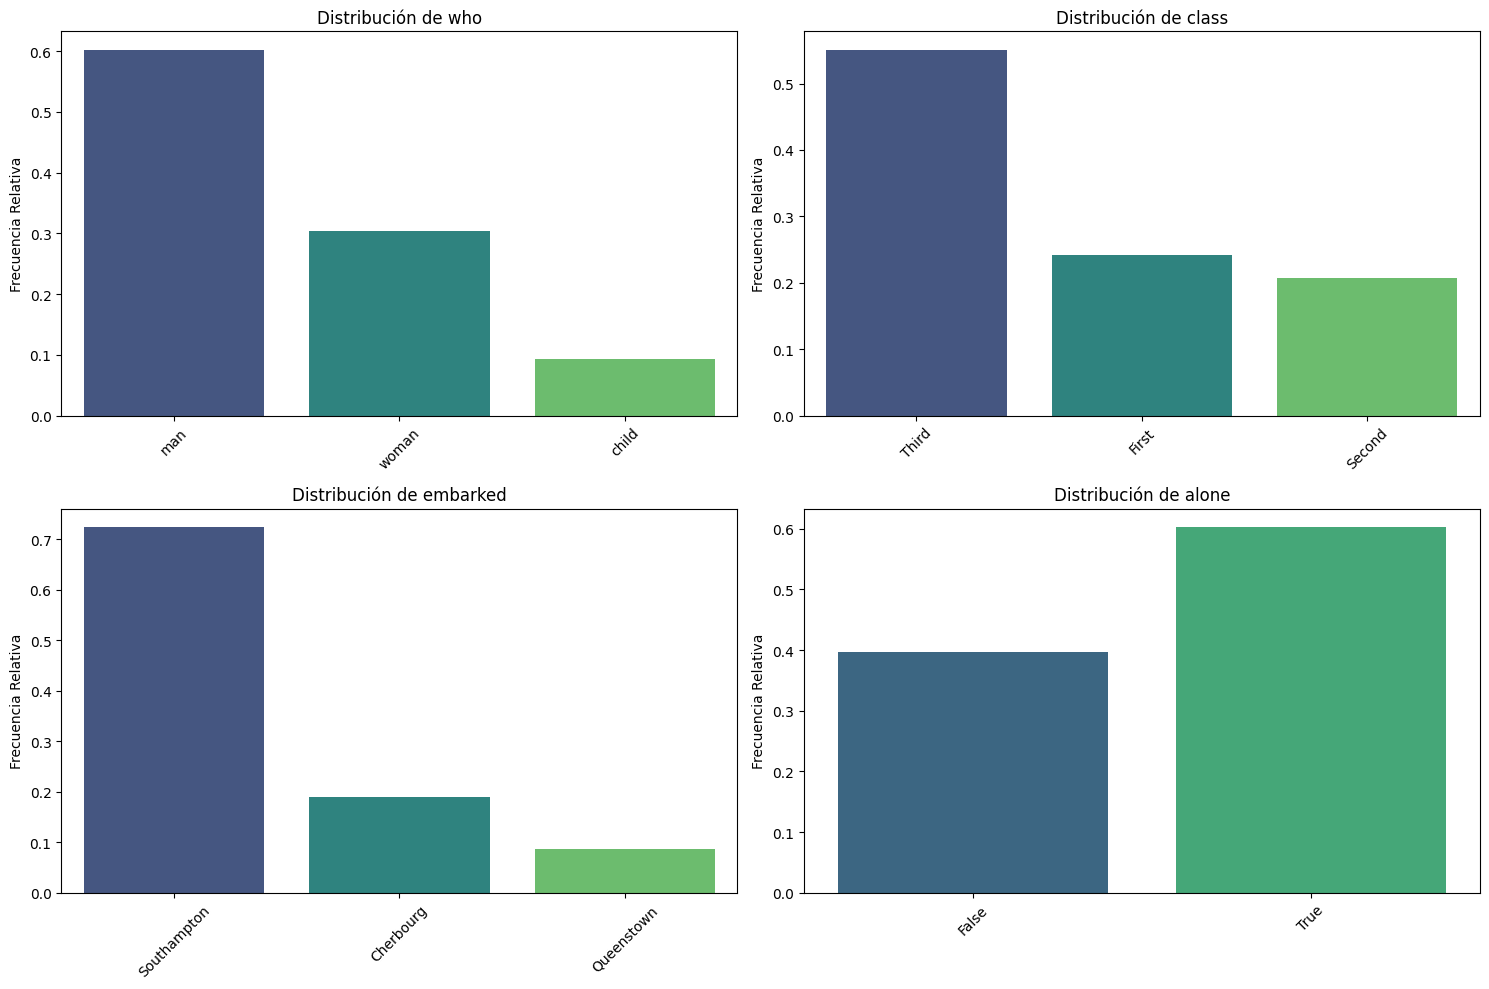

In [50]:
pinta_distribucion_categoricas(df, variables_categoricas, relativa = True)

In [54]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)
    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()


In [55]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()


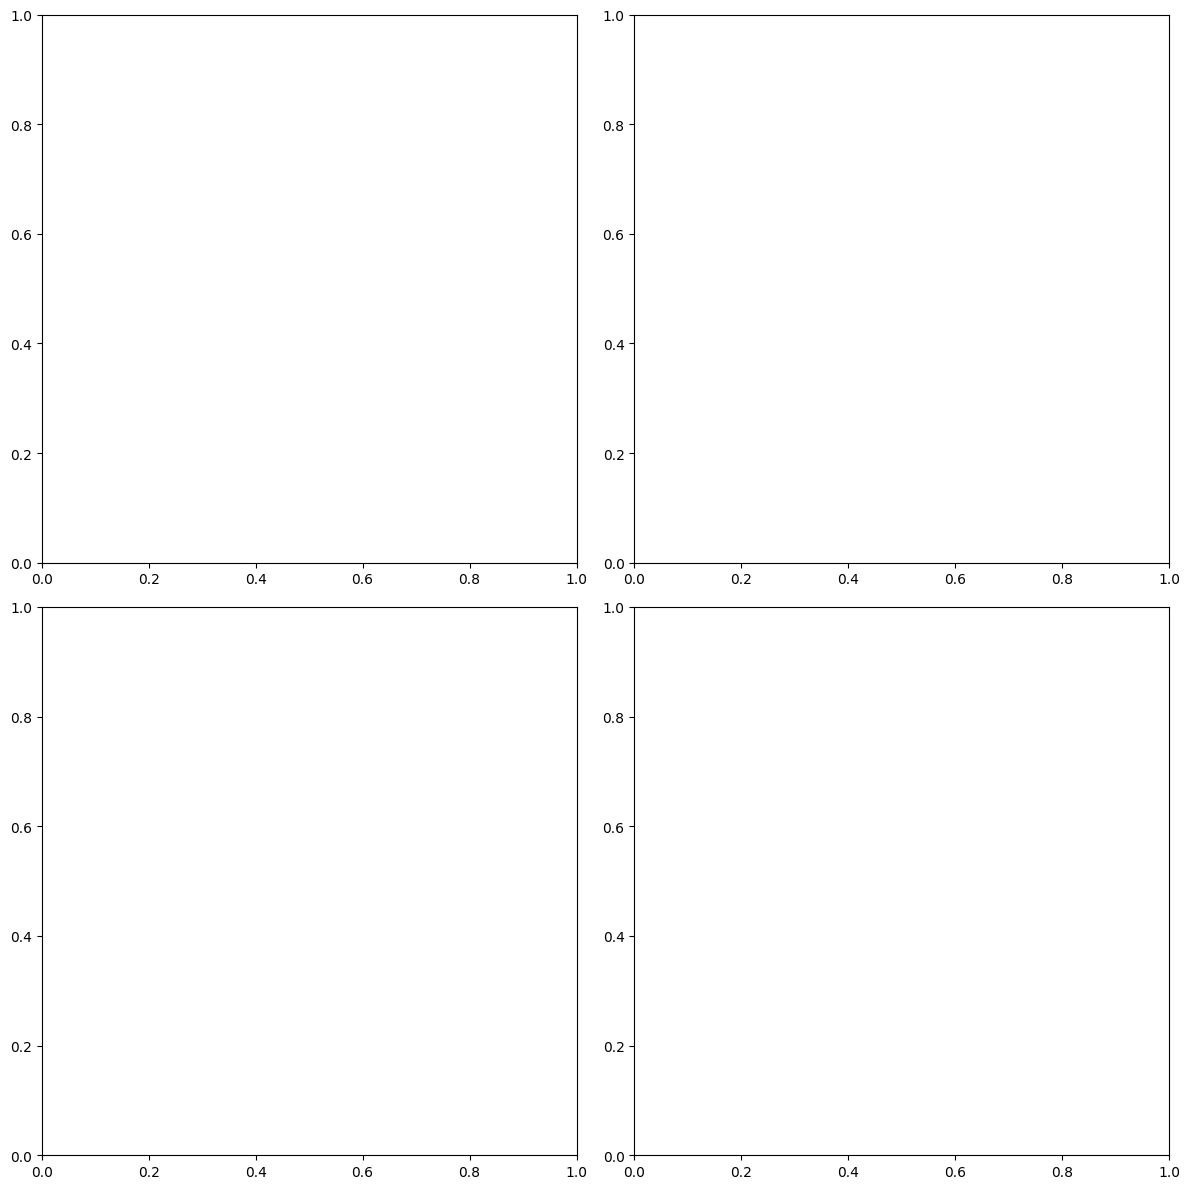

In [56]:
plot_multiple_boxplots(df, variables_categoricas)

In [66]:
print(f"Desv. Std: {df['who'].std()}")

TypeError: could not convert string to float: 'man'

In [58]:
df[variables_categoricas].hist

<bound method hist_frame of        who   class     embarked  alone
0      man   Third  Southampton  False
1    woman   First    Cherbourg  False
2    woman   Third  Southampton   True
3    woman   First  Southampton  False
4      man   Third  Southampton   True
..     ...     ...          ...    ...
886    man  Second  Southampton   True
887  woman   First  Southampton   True
888  woman   Third  Southampton  False
889    man   First    Cherbourg   True
890    man   Third   Queenstown   True

[891 rows x 4 columns]>

In [59]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var


In [61]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()


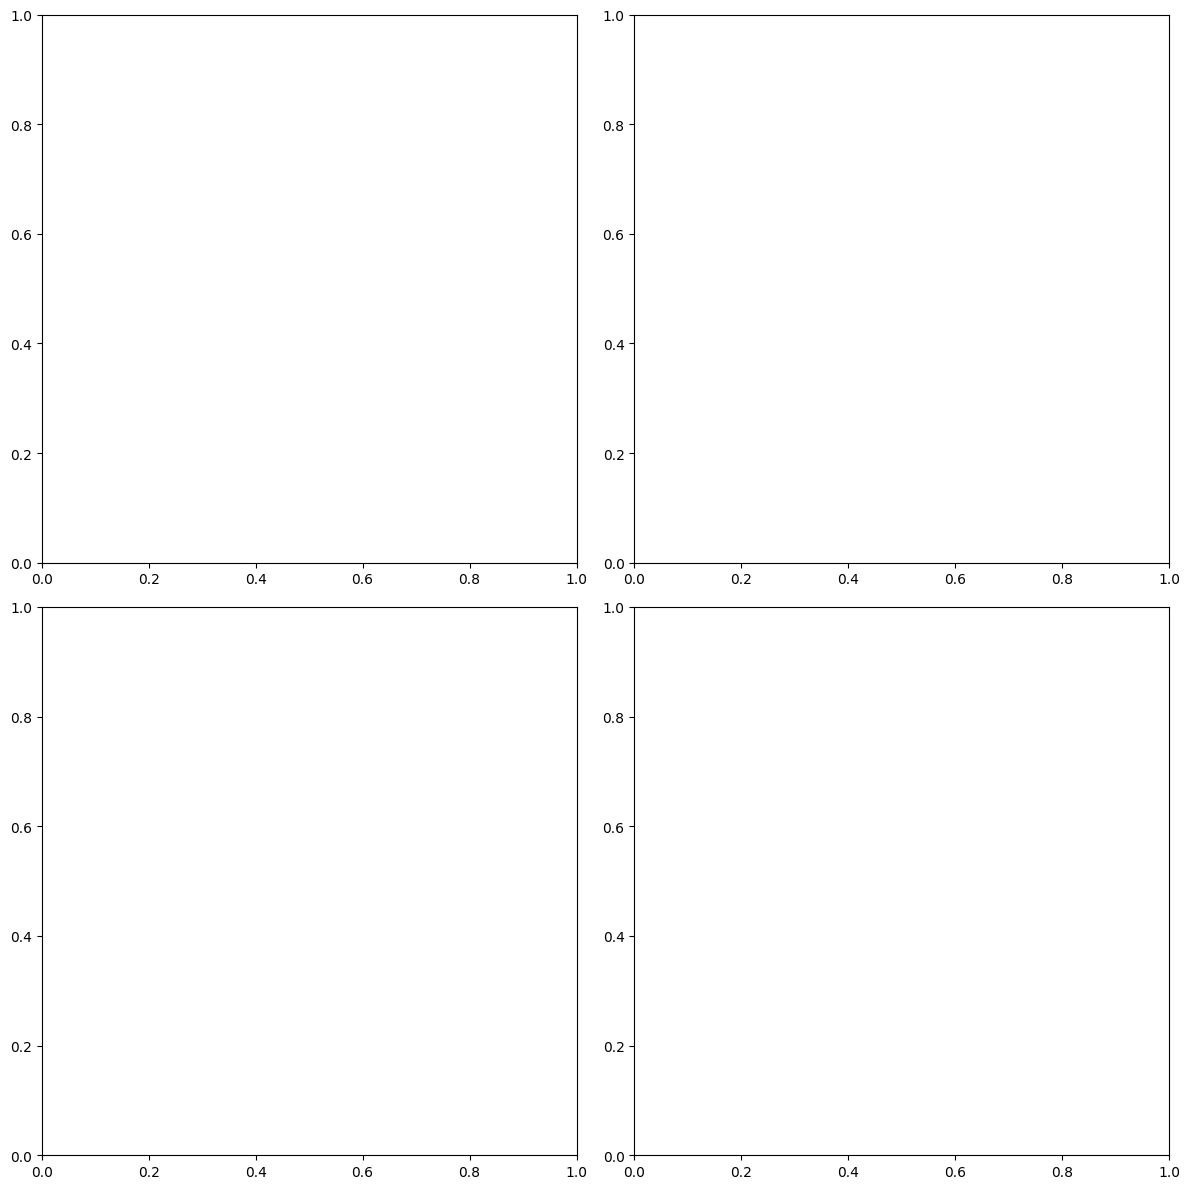

In [63]:
plot_histo_dens(df,variables_categoricas)

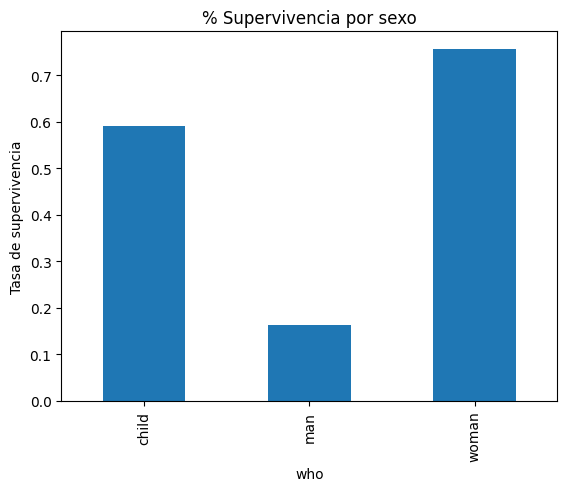

In [65]:
import matplotlib.pyplot as plt

df.groupby('who')['survived'].mean().plot(kind='bar')
plt.ylabel('Tasa de supervivencia')
plt.title('% Supervivencia por sexo')
plt.show()

### #2.2 Numéricas

In [45]:
variables_numericas = ["survived","age", "fare"]

Variable AGE

Media: 29.544332210998878
Mediana: 29.0
Moda: 29
Desviación estándar: 13.013778302447072
Rango: 80
Skewness: 0.4587885976934563
Kurtosis: 0.9743325786859591


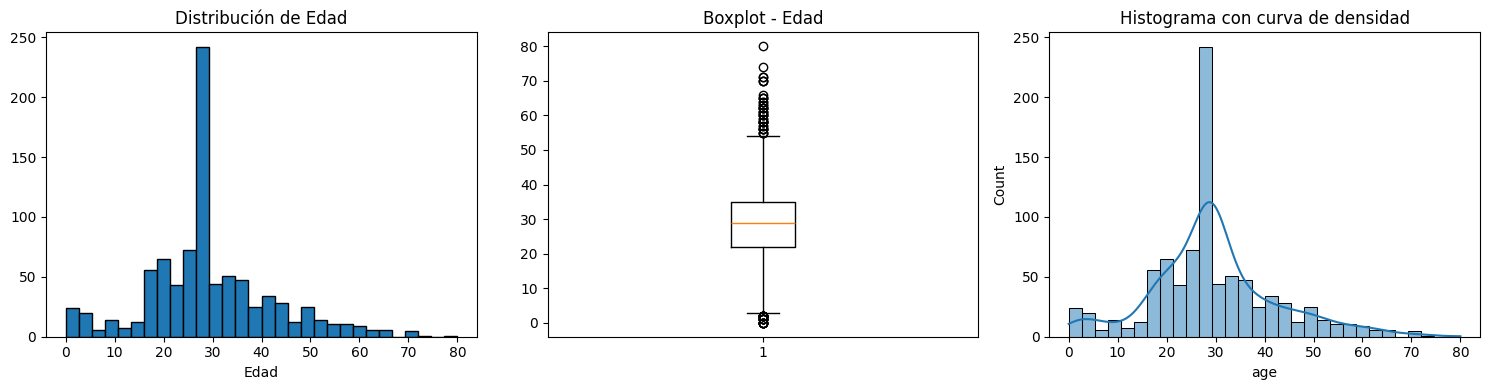

In [69]:
# 1. Medidas de tendencia central
print("Media:", df['age'].mean())
print("Mediana:", df['age'].median())
print("Moda:", df['age'].mode()[0])

# 2. Medidas de dispersión
print("Desviación estándar:", df['age'].std())
print("Rango:", df['age'].max() - df['age'].min())

# 3. Medidas de distribución
from scipy import stats
print("Skewness:", stats.skew(df['age'].dropna()))
print("Kurtosis:", stats.kurtosis(df['age'].dropna()))

# 4. Visualización
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograma
axes[0].hist(df['age'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Distribución de Edad')
axes[0].set_xlabel('Edad')

# Boxplot
axes[1].boxplot(df['age'].dropna())
axes[1].set_title('Boxplot - Edad')

# Histograma + KDE
import seaborn as sns
sns.histplot(df['age'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Histograma con curva de densidad')

plt.tight_layout()
plt.show()

# 5. Conclusiones (escribe tú 2-3 observaciones)

In [70]:
print("Media:", df["survived"].mean())
print("Mediana: ", df["survived"].mean())
print("Moda:", df["survived"].mode()[0])

Media: 0.3838383838383838
Mediana:  0.3838383838383838
Moda: 0


In [71]:
print("Desviación estándar: ", df["survived"].std())
print("Rango:", df["survived"].max() - df["survived"].min())

Desviación estándar:  0.4865924542648575
Rango: 1


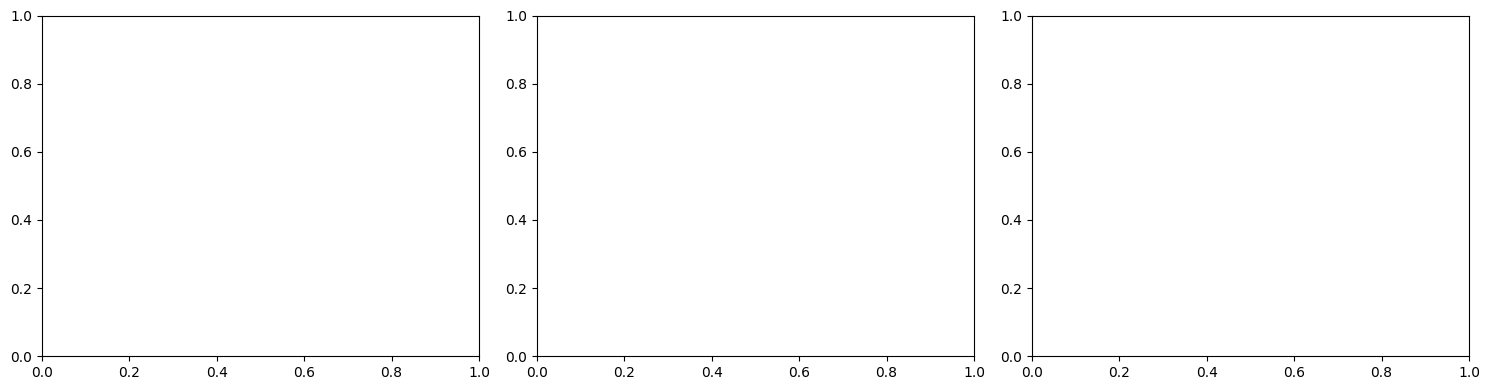

In [76]:
fig, axes = plt.subplots(1,3, figsize = (15,4))
plt.tight_layout()
plt.show()

In [75]:
axes[0].hist(df['age'].dropna(), bins=30, edgecolor='black')
axes[0].set_title('Distribución de supervivencia')
axes[0].set_xlabel('Supervivencia')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

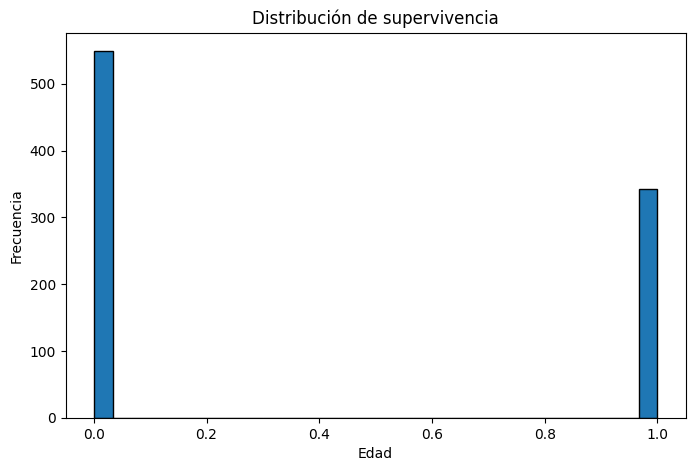

In [78]:
plt.figure(figsize=(8, 5))
plt.hist(df['survived'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

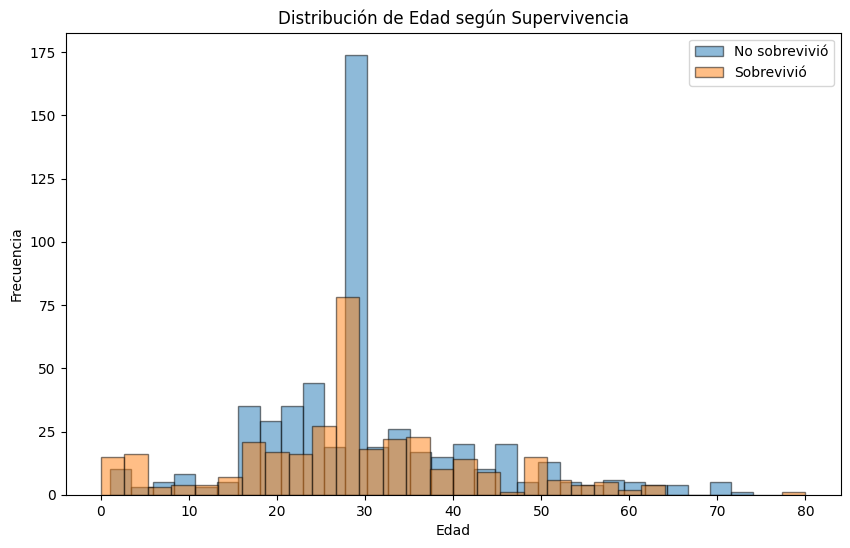

In [79]:
# Histograma separado por supervivencia
plt.figure(figsize=(10, 6))

# Edades de los que murieron
plt.hist(df[df['survived'] == 0]['age'].dropna(), bins=30, alpha=0.5, label='No sobrevivió', edgecolor='black')

# Edades de los que sobrevivieron
plt.hist(df[df['survived'] == 1]['age'].dropna(), bins=30, alpha=0.5, label='Sobrevivió', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad según Supervivencia')
plt.legend()
plt.show()